In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from test_tfrecord_reader import TFRecordReader

In [3]:
test_dataset = TFRecordReader("D:/PROJECTS/internship/test_records").test_dataset()
model = tf.keras.models.load_model(
    "D:/PROJECTS/internship/saved model/unet_2_model.h5", compile=False)

In [4]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()


In [5]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]


In [9]:
def show_predictions(dataset=None, num=1):
    for image, mask in dataset.take(num):
        pred_mask = model.predict(image)
        pred_mask *= 255.0
        print(pred_mask.min())
        print(pred_mask.max())
        print(np.unique(pred_mask, return_counts=True))
        display([image[0], mask[0], create_mask(pred_mask)])

0.0
255.0
(array([0.0000000e+00, 3.0076955e-36, 3.0084528e-36, ..., 2.5499994e+02,
       2.5499997e+02, 2.5500000e+02], dtype=float32), array([  11890,       1,       1, ...,      23,      60, 1187196],
      dtype=int64))


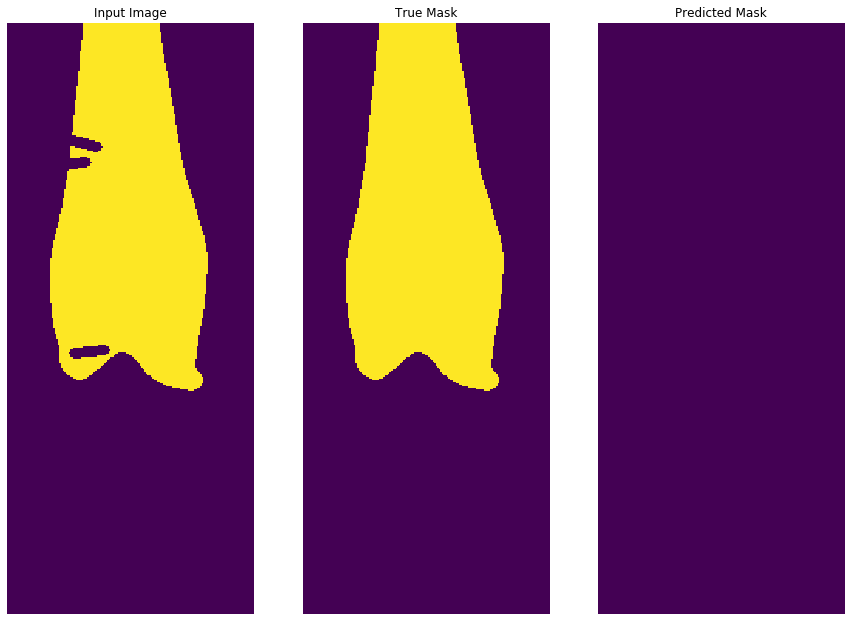

0.0
255.0
(array([0.0000000e+00, 3.0049202e-36, 3.0081312e-36, ..., 2.5499994e+02,
       2.5499997e+02, 2.5500000e+02], dtype=float32), array([  11995,       1,       1, ...,      30,      69, 1163593],
      dtype=int64))


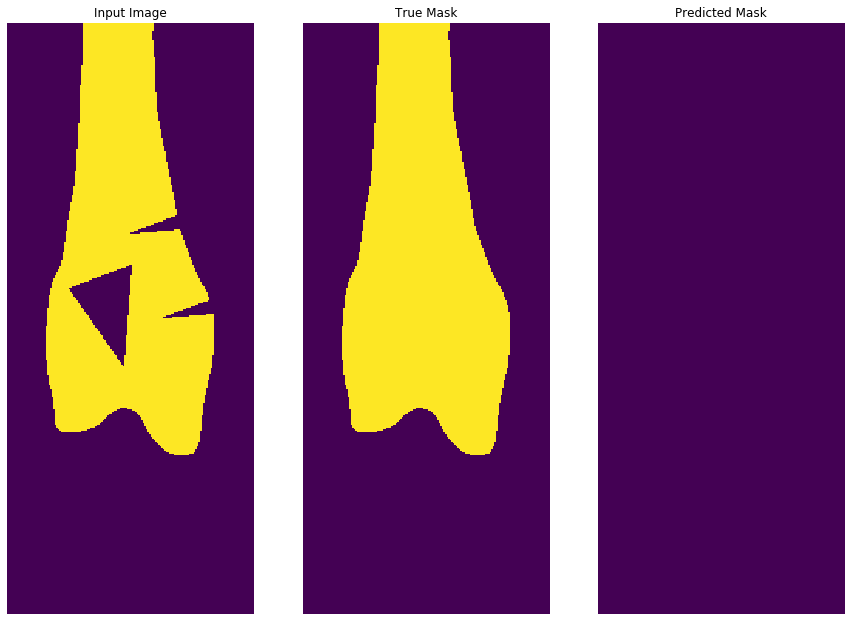

0.0
255.0
(array([0.0000000e+00, 3.0041638e-36, 3.0153464e-36, ..., 2.5499994e+02,
       2.5499997e+02, 2.5500000e+02], dtype=float32), array([  11925,       1,       1, ...,      18,      58, 1161831],
      dtype=int64))


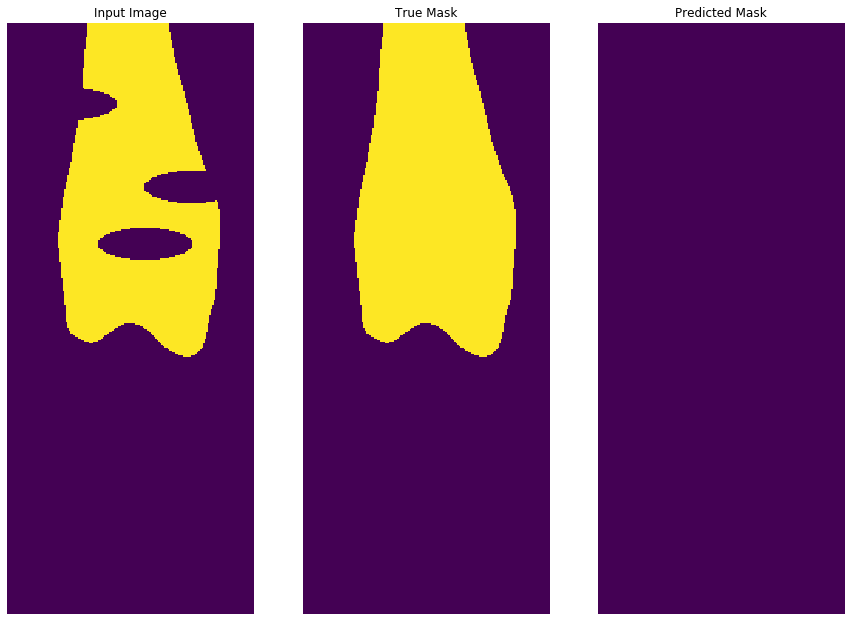

In [10]:
show_predictions(test_dataset, 3)
